In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
predictors = pd.read_csv('predictors.csv')
target = pd.read_csv('target.csv')

In [ ]:
predictor = pd.get_dummies(predictors.drop(columns=['Max Salary']), drop_first=True)

In [ ]:
X=predictor
y=target

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(predictors, target, test_size=0.2, random_state=42)


In [ ]:
train_X_encoded = pd.get_dummies(train_X)
valid_X_encoded = pd.get_dummies(valid_X)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(train_X_encoded, train_y.values.ravel())

RandomForestRegressor(random_state=1)

In [ ]:
train_X_encoded, valid_X_encoded = train_X_encoded.align(valid_X_encoded, join='left', axis=1, fill_value=0)

In [ ]:
pred_y = rf.predict(valid_X_encoded)

In [ ]:
mse = mean_squared_error(valid_y, pred_y)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.427144003964322


In [ ]:
feature_importances = rf.feature_importances_
feature_names = train_X.columns

In [ ]:
importance_df = pd.DataFrame({'Feature': feature_names,
                             'Importance': feature_importances[:len(feature_names)]}) # Trim feature_importances to match length of feature_names
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
import matplotlib.pyplot as plt # Import the plotting library

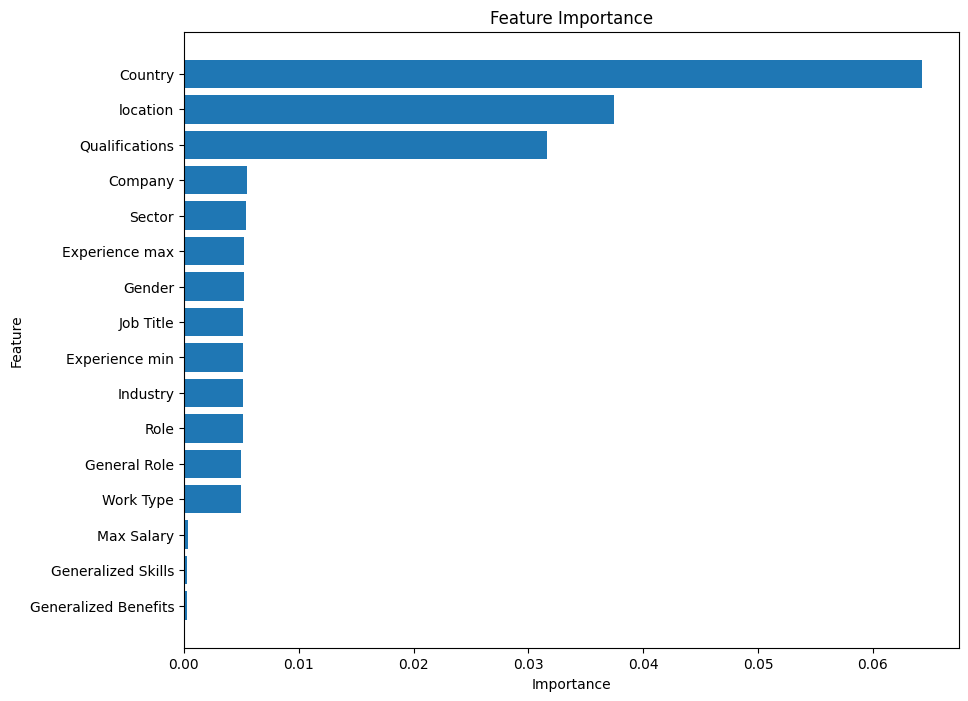

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()